**Title:** Energy Production Optimization in Combined-Cycle Power Plants

**Business Objective:**
The primary objective of this project is to model the energy generated in a combined-cycle power plant as a function of exhaust vacuum and ambient variables. By developing a predictive model, we aim to optimize the plant's performance and enhance its energy production efficiency.


The variables, or features, are the following:

**temperature**, in degrees Celsius.

**exhaust_vacuum**, in cm Hg.

**amb_pressure**, in millibar. (Ambient pressure)

**r_humidity**, in percentage. (Relative humidity)

**energy_production**, in MW, net hourly electrical energy output.



#Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.graphics.regressionplots import influence_plot

#Loading Dataset

In [3]:
ep=pd.read_csv('/content/Copy of energy_production (1)..csv',delimiter=';')
ep

temperature  exhaust_vacuum  amb_pressure  r_humidity  energy_production
0            9.59           38.56       1017.01       60.10             481.30
1           12.04           42.34       1019.72       94.67             465.36
2           13.87           45.08       1024.42       81.69             465.48
3           13.72           54.30       1017.89       79.08             467.05
4           15.14           49.64       1023.78       75.00             463.58
...           ...             ...           ...         ...                ...
9563        17.10           49.69       1005.53       81.82             457.32
9564        24.73           65.34       1015.42       52.80             446.92
9565        30.44           56.24       1005.19       56.24             429.34
9566        23.00           66.05       1020.61       80.29             421.57
9567        17.75           49.25       1020.86       63.67             454.41

[9568 rows x 5 columns]

In [4]:
ep.shape

(9568, 5)

In [5]:
ep.describe()

temperature  exhaust_vacuum  amb_pressure   r_humidity  \
count  9568.000000     9568.000000   9568.000000  9568.000000   
mean     19.651231       54.305804   1013.259078    73.308978   
std       7.452473       12.707893      5.938784    14.600269   
min       1.810000       25.360000    992.890000    25.560000   
25%      13.510000       41.740000   1009.100000    63.327500   
50%      20.345000       52.080000   1012.940000    74.975000   
75%      25.720000       66.540000   1017.260000    84.830000   
max      37.110000       81.560000   1033.300000   100.160000   

       energy_production  
count        9568.000000  
mean          454.365009  
std            17.066995  
min           420.260000  
25%           439.750000  
50%           451.550000  
75%           468.430000  
max           495.760000

The data file combined_cycle_power_plant.csv contains 9568 samples with five variables collected from a combined cycle power plant over six years when the power plant was set to work with a full load. The measurements were taken every second.

The variables, or features, are the following:
1.   temperature, in degrees Celsius
2.  exhaust_vacuum, in cm Hg.
3.   ambient_pressure, in millibar.
4.   relative_humidity, in percentage.
5.   energy, in MW, net hourly electrical energy output.

#EDA and visualization

In [6]:
ep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   temperature        9568 non-null   float64
 1   exhaust_vacuum     9568 non-null   float64
 2   amb_pressure       9568 non-null   float64
 3   r_humidity         9568 non-null   float64
 4   energy_production  9568 non-null   float64
dtypes: float64(5)
memory usage: 373.9 KB


#duplicates

In [7]:
ep[ep.duplicated()]

temperature  exhaust_vacuum  amb_pressure  r_humidity  energy_production
2066        10.72           41.17       1019.68       60.71             479.21
2780        28.41           75.60       1018.48       56.07             440.28
3333        24.79           75.60       1017.07       68.23             440.05
3467         7.64           41.17       1020.01       75.14             488.53
3550        25.42           75.60       1017.39       77.63             438.24
3747        11.61           41.17       1019.57       58.82             476.81
4292        12.27           41.17       1019.41       58.10             475.13
4528        24.63           59.57       1010.45       85.36             440.67
5065         8.57           41.17       1020.18       72.47             484.20
5564        11.82           41.17       1019.50       55.74             475.61
5812        25.21           75.60       1017.19       69.84             445.84
5975         7.87           41.17       1020.33       77.77             486.20
5983         6.86           41.17       1020.12       79.14             490.23
6413        28.84           75.60       1018.41       53.96             442.69
6861        11.23           41.17       1019.36       56.85             475.85
6948        25.56           75.60       1017.37       69.31             442.20
7065         9.83           41.17       1019.34       72.29             478.21
7124        26.12           75.60       1017.41       72.31             439.68
7231        29.23           75.60       1017.72       52.26             438.92
7274        12.19           41.17       1019.43       65.47             475.64
7453        26.45           75.60       1017.42       74.50             436.89
7675         6.06           41.17       1019.67       84.70             489.62
7732        29.51           75.60       1017.92       50.61             431.18
7779        12.11           41.17       1019.46       62.59             475.53
7821        28.37           75.60       1017.48       55.19             439.25
7839         8.44           41.17       1019.90       70.72             486.15
7843        29.05           75.60       1017.63       51.16             439.14
7907         8.07           41.17       1019.40       86.43             484.54
7948        26.85           75.60       1017.43       74.55             433.48
8212        27.54           75.60       1018.26       57.89             440.87
8290         7.24           41.17       1020.35       80.56             486.76
8542        25.79           75.60       1017.46       75.63             434.65
8777        25.53           59.57       1010.65       82.04             445.59
8879         9.54           41.17       1019.79       65.61             481.18
9028         6.40           41.17       1019.54       85.37             488.82
9154        29.45           75.60       1018.12       50.68             437.31
9163         6.03           41.17       1019.81       84.20             488.57
9272        12.00           41.17       1019.48       58.71             474.40
9482        12.27           41.17       1019.39       52.18             473.84
9521        27.64           75.60       1017.35       54.78             441.04
9537        25.91           75.60       1018.23       62.65             443.20

In [8]:
ep[ep.duplicated()].shape

(41, 5)

In [9]:
ep_cleaned1=ep.drop_duplicates()

In [10]:
ep_cleaned1.shape

(9527, 5)

# Pair plot

In [11]:
sns.set_style(style='darkgrid')
sns.pairplot(ep_cleaned1)

#Scatter plot

In [12]:
plt.figure(figsize=(20,10))
plt.subplot(1,4,1)
sns.scatterplot(x='temperature',y='energy_production',data=ep_cleaned1,color='purple')

plt.subplot(1,4,2)
sns.scatterplot(x='exhaust_vacuum',y='energy_production',data=ep_cleaned1,color='red')

plt.subplot(1,4,3)
sns.scatterplot(x='amb_pressure',y='energy_production',data=ep_cleaned1,color='orange')

plt.subplot(1,4,4)
sns.scatterplot(x='r_humidity',y='energy_production',data=ep_cleaned1,color='green')

plt.tight_layout()
plt.show()

#Distribution Plots:


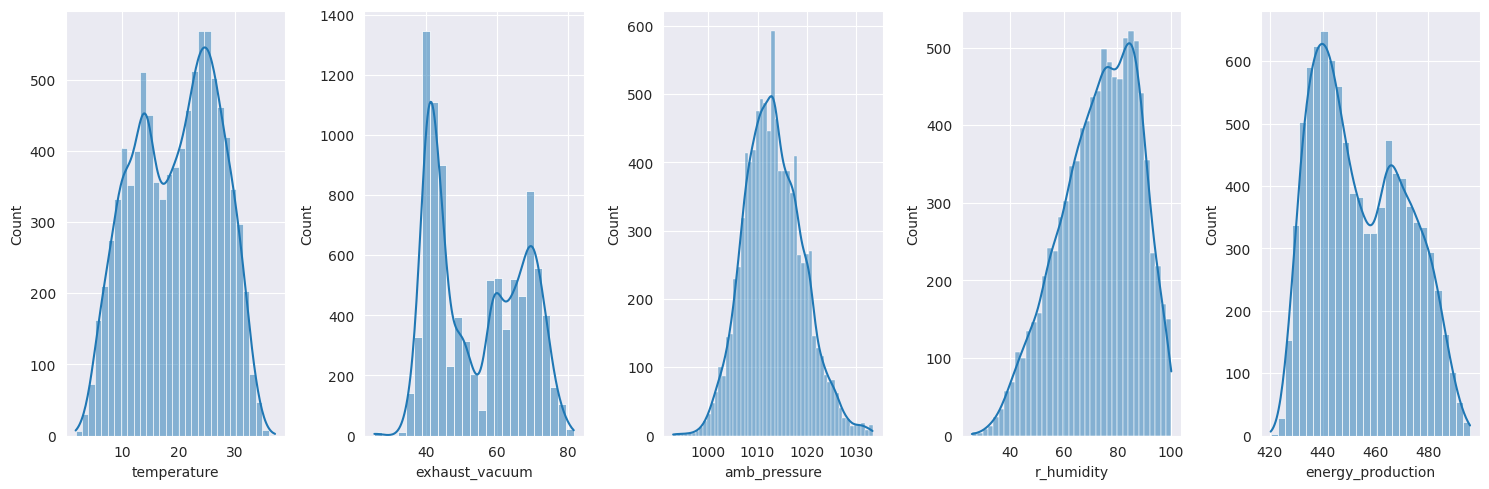

In [13]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 5, 1)
sns.histplot(ep_cleaned1['temperature'], kde=True)

plt.subplot(1, 5, 2)
sns.histplot(ep_cleaned1['exhaust_vacuum'], kde=True)

plt.subplot(1, 5, 3)
sns.histplot(ep_cleaned1['amb_pressure'], kde=True)

plt.subplot(1, 5, 4)
sns.histplot(ep_cleaned1['r_humidity'], kde=True)

plt.subplot(1, 5, 5)
sns.histplot(ep_cleaned1['energy_production'], kde=True)

plt.tight_layout()
plt.show()

#Line plot

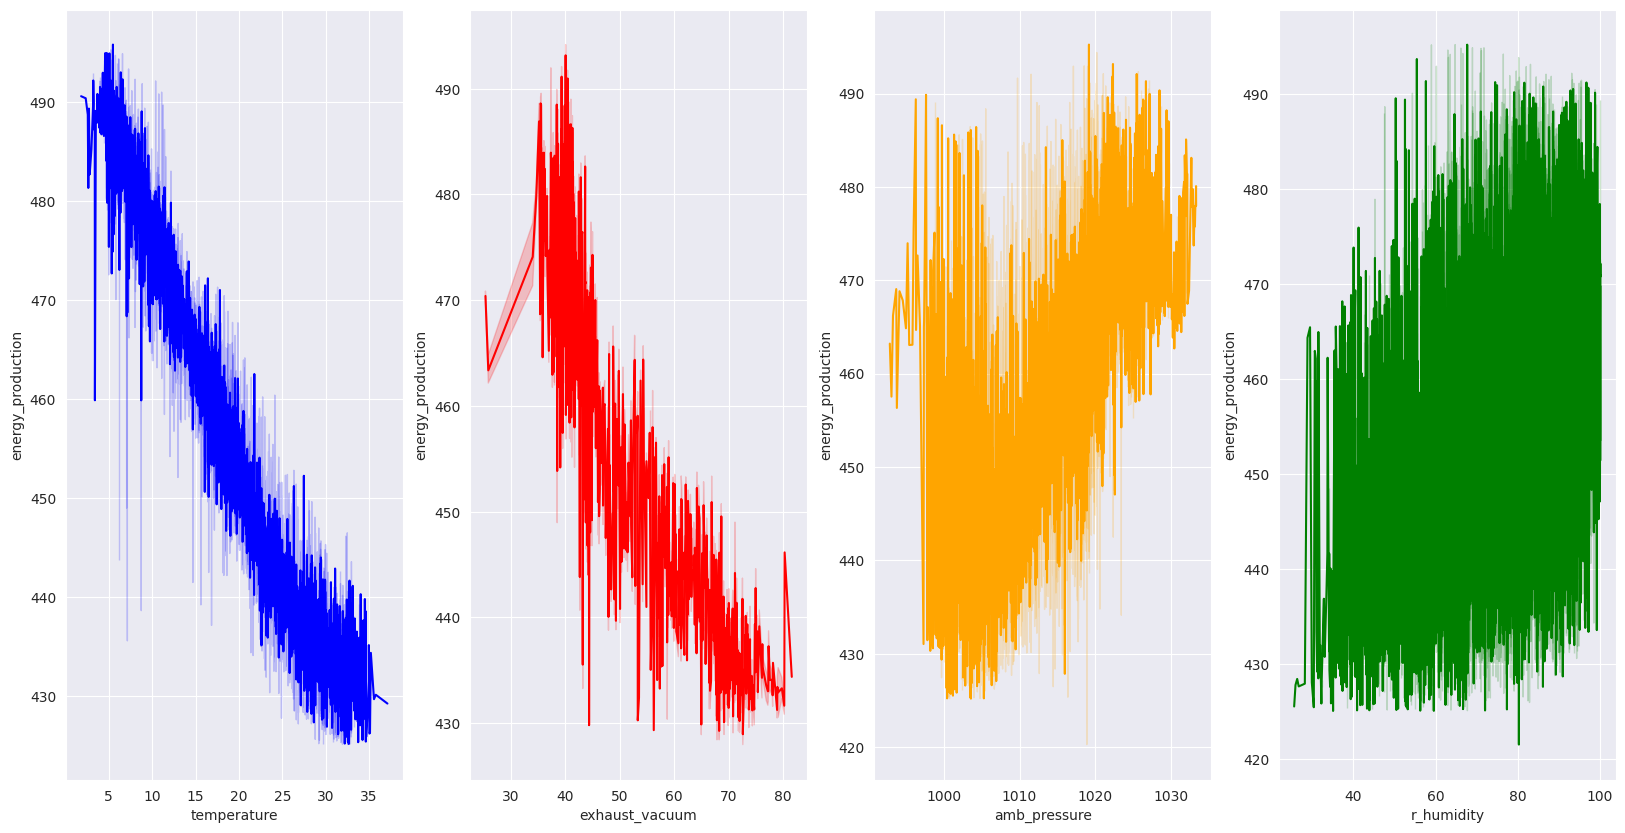

In [14]:
plt.figure(figsize=(20,10))
plt.subplot(1,4,1)
sns.lineplot(x='temperature',y='energy_production',data=ep_cleaned1,color='blue')

plt.subplot(1,4,2)
sns.lineplot(x='exhaust_vacuum',y='energy_production',data=ep_cleaned1,color='red')

plt.subplot(1,4,3)
sns.lineplot(x='amb_pressure',y='energy_production',data=ep_cleaned1,color='orange')
plt.subplot(1,4,4)
sns.lineplot(x='r_humidity',y='energy_production',data=ep_cleaned1,color='green')
plt.show()

line plot is used to show the trend of variable over contineous intervals

#Violinplot

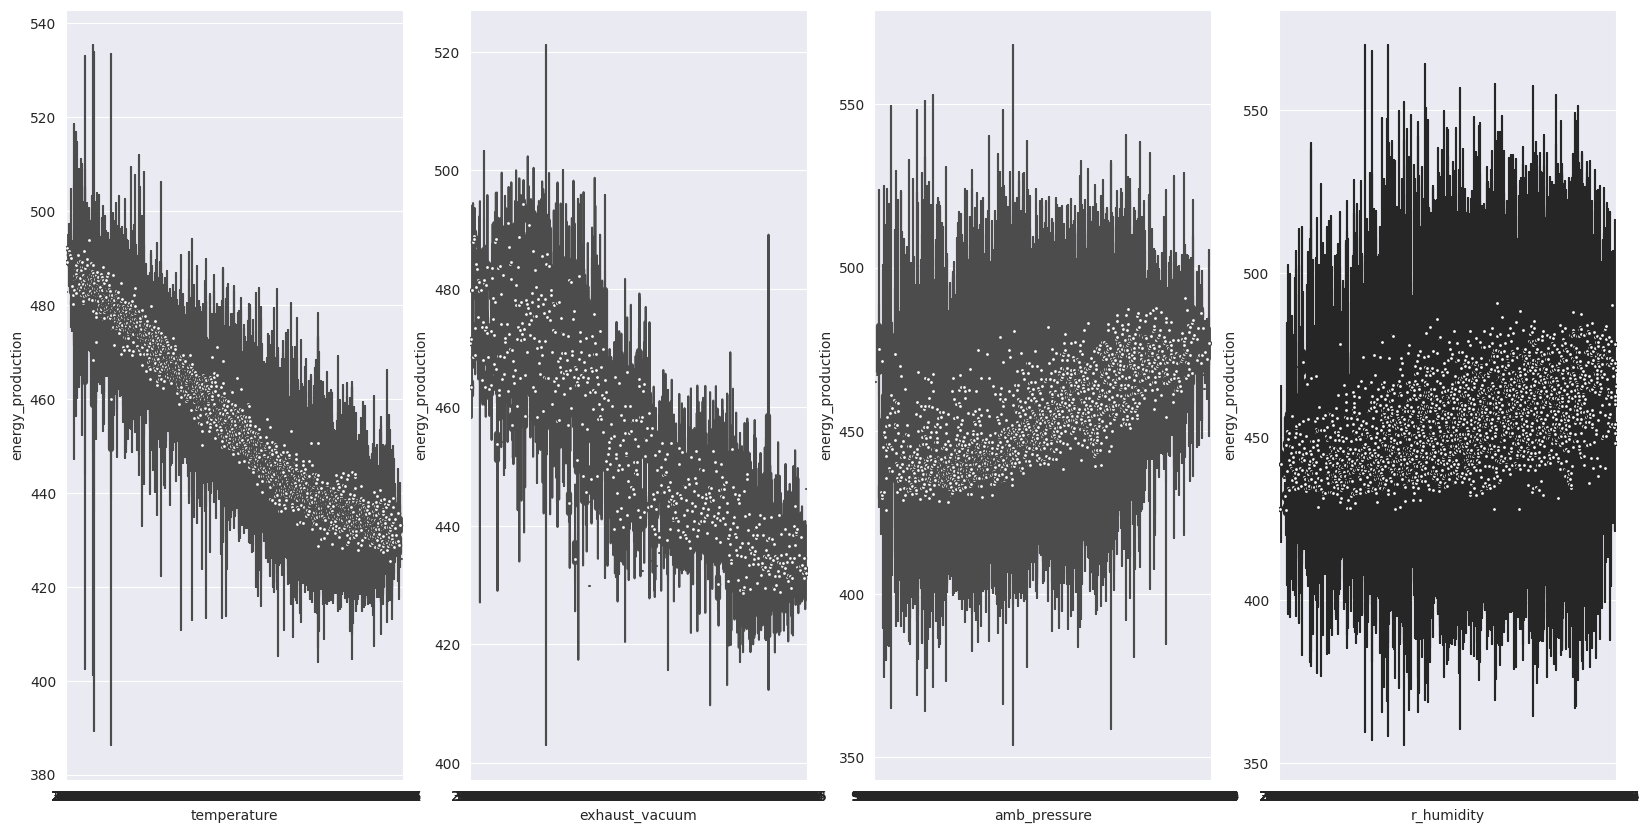

In [15]:
plt.figure(figsize=(20,10))
plt.subplot(1,4,1)
sns.violinplot(x='temperature',y='energy_production',data=ep_cleaned1,color='blue')

plt.subplot(1,4,2)
sns.violinplot(x='exhaust_vacuum',y='energy_production',data=ep_cleaned1,color='red')

plt.subplot(1,4,3)
sns.violinplot(x='amb_pressure',y='energy_production',data=ep_cleaned1,color='orange')

plt.subplot(1,4,4)
sns.violinplot(x='r_humidity',y='energy_production',data=ep_cleaned1,color='green')
plt.show()

#Joint plot

<Figure size 1500x500 with 0 Axes>

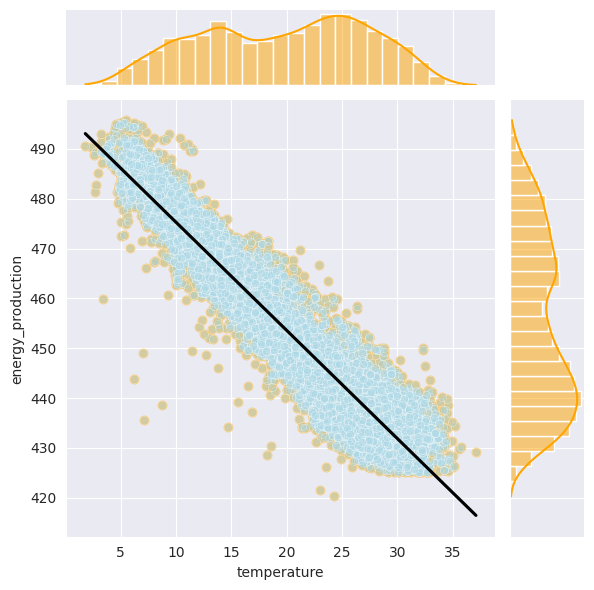

In [16]:
plt.figure(figsize=(15, 5))
g=sns.jointplot(x='temperature', y='energy_production', data=ep_cleaned1, kind='reg',
              scatter_kws={'alpha': 0.6, 'color': 'orange'},
              joint_kws={'color': 'black'},
              marginal_kws=dict(bins=25, color='orange'))
g.plot_joint(sns.scatterplot, color='lightblue', alpha=0.5)
plt.show();

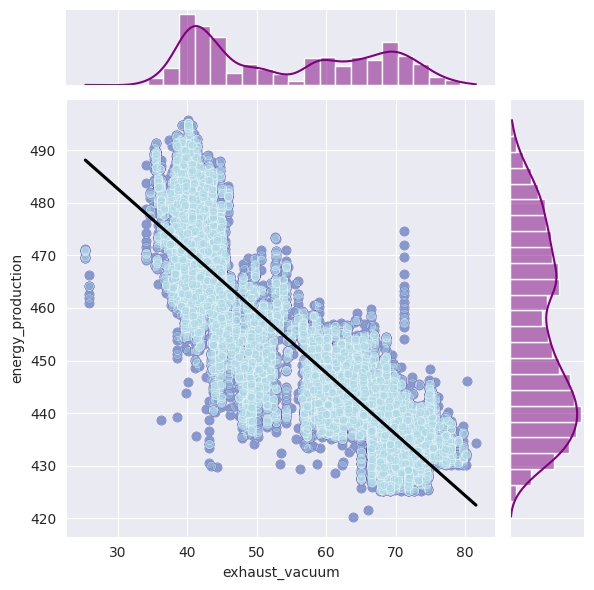

In [17]:
g1=sns.jointplot(x='exhaust_vacuum', y='energy_production', data=ep_cleaned1, kind='reg',
              scatter_kws={'alpha': 0.6, 'color': 'darkblue'},
              joint_kws={'color': 'black'},
              marginal_kws=dict(bins=25, color='purple'))
g1.plot_joint(sns.scatterplot, color='lightblue', alpha=0.5)
plt.show();

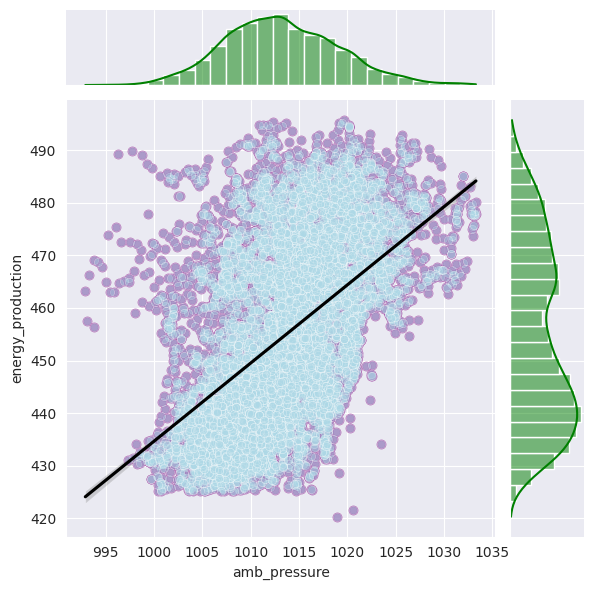

In [18]:
g2=sns.jointplot(x='amb_pressure', y='energy_production', data=ep_cleaned1, kind='reg',
              scatter_kws={'alpha': 0.6, 'color': 'purple'},
              joint_kws={'color': 'black'},
              marginal_kws=dict(bins=25, color='green'))
g2.plot_joint(sns.scatterplot, color='lightblue', alpha=0.5)
plt.show();

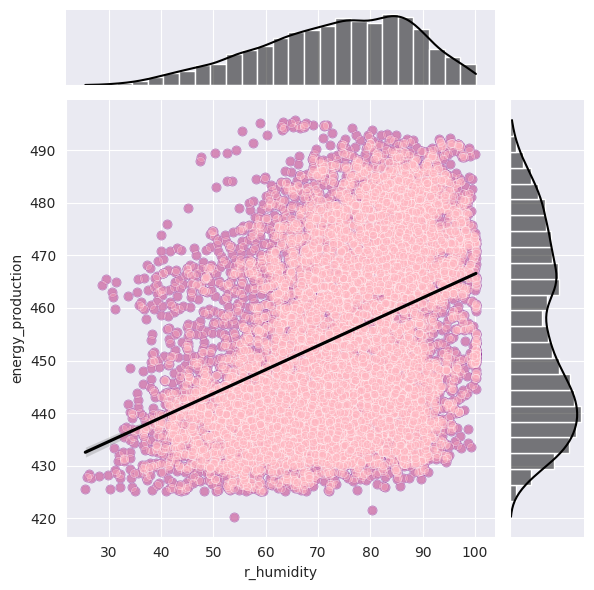

In [19]:
g3=sns.jointplot(x='r_humidity', y='energy_production', data=ep_cleaned1, kind='reg',
              scatter_kws={'alpha': 0.6, 'color': 'purple'},
              joint_kws={'color': 'black'},
              marginal_kws=dict(bins=25, color='black'))
g3.plot_joint(sns.scatterplot, color='lightpink', alpha=0.5)
plt.show();

From the above visualization we can observe that as temperature and vacuum is increasing energy production is decreasing and as humidity and pressure is increasing enegry production is also increasing.

In [20]:
import plotly.express as px

fig = px.scatter(ep_cleaned1, x='temperature', y='energy_production', color='exhaust_vacuum',
                 title='Interactive Scatter Plot with Color',
                 labels={'temperature': 'Temperature (Celsius)', 'energy_production': 'Energy Production (MW)'},
                 hover_name=ep_cleaned1.index)

# Update layout for better visualization
fig.update_layout(
    title='Interactive Scatter Plot with Color',
    xaxis=dict(title='Temperature (Celsius)'),
    yaxis=dict(title='Energy Production (MW)'),
    hovermode='closest'
)

# Show the interactive plot
fig.show()


This code uses Plotly Express to create an interactive scatter plot. The plot allow us to hover over points to see specific data points and zoom in/out.In this plot we can observe the production of energy with respect to temperature and exhaust vacuum.As both temperature and vacuum are increasing the energy production is decreasing

In [21]:
import plotly.express as px


fig = px.scatter(ep_cleaned1, x='amb_pressure', y='energy_production', color='r_humidity',
                 title='Interactive Scatter Plot with Color',
                 labels={'amb_pressure': 'Pressure(Millibar)', 'energy_production': 'Energy Production (MW)'},
                 hover_name=ep_cleaned1.index)

# Update layout for better visualization
fig.update_layout(
    title='Interactive Scatter Plot with Color',
    xaxis=dict(title='Pressure(Millibar)'),
    yaxis=dict(title='Energy Production (MW)'),
    hovermode='closest'
)

# Show the interactive plot
fig.show()


This code uses Plotly Express to create an interactive scatter plot. The plot allow us to hover over points to see specific data points and zoom in/out.In this plot we can observe the production of energy with respect to ambient pressure and relative humidity.From the above plot we can observe that humidity is playing a major role in the production of energy

#3D Plot

In [22]:

fig = px.scatter_3d(ep_cleaned1, x='temperature', y='exhaust_vacuum', z='r_humidity',
                    color='energy_production', size_max=30, opacity=0.7,
                    title='3D Scatter Plot: Energy Production vs Temperature, Exhaust Vacuum, and Relative Humidity',
                    labels={'temperature': 'Temperature (Celsius)', 'exhaust_vacuum': 'Exhaust Vacuum (cm Hg)', 'r_humidity': 'Relative Humidity', 'energy_production': 'Energy Production (MW)'},
                    hover_name=ep_cleaned1.index)

# Show the interactive plot
fig.show()


In [23]:
fig = px.scatter_3d(ep_cleaned1, x='temperature', y='amb_pressure', z='r_humidity',
                    color='energy_production', size_max=30, opacity=0.7,
                    title='3D Scatter Plot: Energy Production vs Temperature, Ambient Pressure, and Relative Humidity',
                    labels={'temperature': 'Temperature (Celsius)', 'amb_pressure': 'Ambient Pressure', 'r_humidity': 'Relative Humidity', 'energy_production': 'Energy Production (MW)'},
                    hover_name=ep_cleaned1.index)

# Show the interactive plot
fig.show()


In [24]:
fig = px.scatter_3d(ep_cleaned1, x='exhaust_vacuum', y='amb_pressure', z='r_humidity',
                    color='energy_production', size_max=30, opacity=0.7,
                    title='3D Scatter Plot: Energy Production vs Exhaust Vacuum, Ambient Pressure and Relative Humidity',
                    labels={ 'exhaust_vacuum': 'Exhaust Vacuum (cm Hg)','amb_pressure':'Ambient Pressure', 'r_humidity': 'Relative Humidity', 'energy_production': 'Energy Production (MW)'},
                    hover_name=ep_cleaned1.index)

# Show the interactive plot
fig.show()



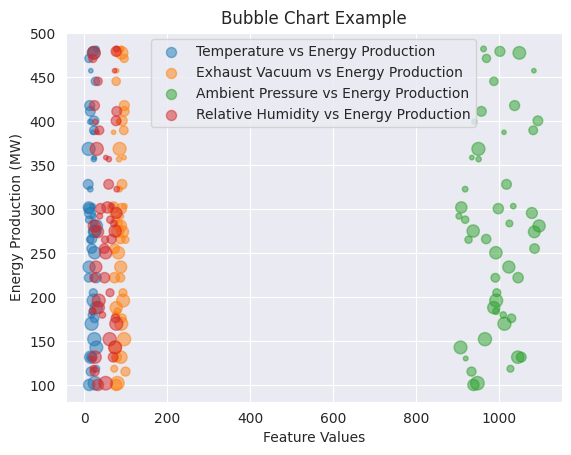

In [25]:

temperature = np.random.uniform(10, 30, 50)
exhaust_vacuum = np.random.uniform(70, 100, 50)
amb_pressure = np.random.uniform(900, 1100, 50)
r_humidity = np.random.uniform(20, 80, 50)
energy_production = np.random.uniform(100, 500, 50)

# Bubble sizes (scaled for better visualization)
bubble_sizes = np.random.uniform(10, 100, 50)

# Scatter plot with bubble sizes
plt.scatter(temperature, energy_production, s=bubble_sizes, alpha=0.5, label='Temperature vs Energy Production')
plt.scatter(exhaust_vacuum, energy_production, s=bubble_sizes, alpha=0.5, label='Exhaust Vacuum vs Energy Production')
plt.scatter(amb_pressure, energy_production, s=bubble_sizes, alpha=0.5, label='Ambient Pressure vs Energy Production')
plt.scatter(r_humidity, energy_production, s=bubble_sizes, alpha=0.5, label='Relative Humidity vs Energy Production')

# Add labels and title
plt.xlabel('Feature Values')
plt.ylabel('Energy Production (MW)')
plt.title('Bubble Chart Example')

# Add legend
plt.legend()

# Display the plot
plt.show()


#Outlier detection and treatement

#1.Histogram

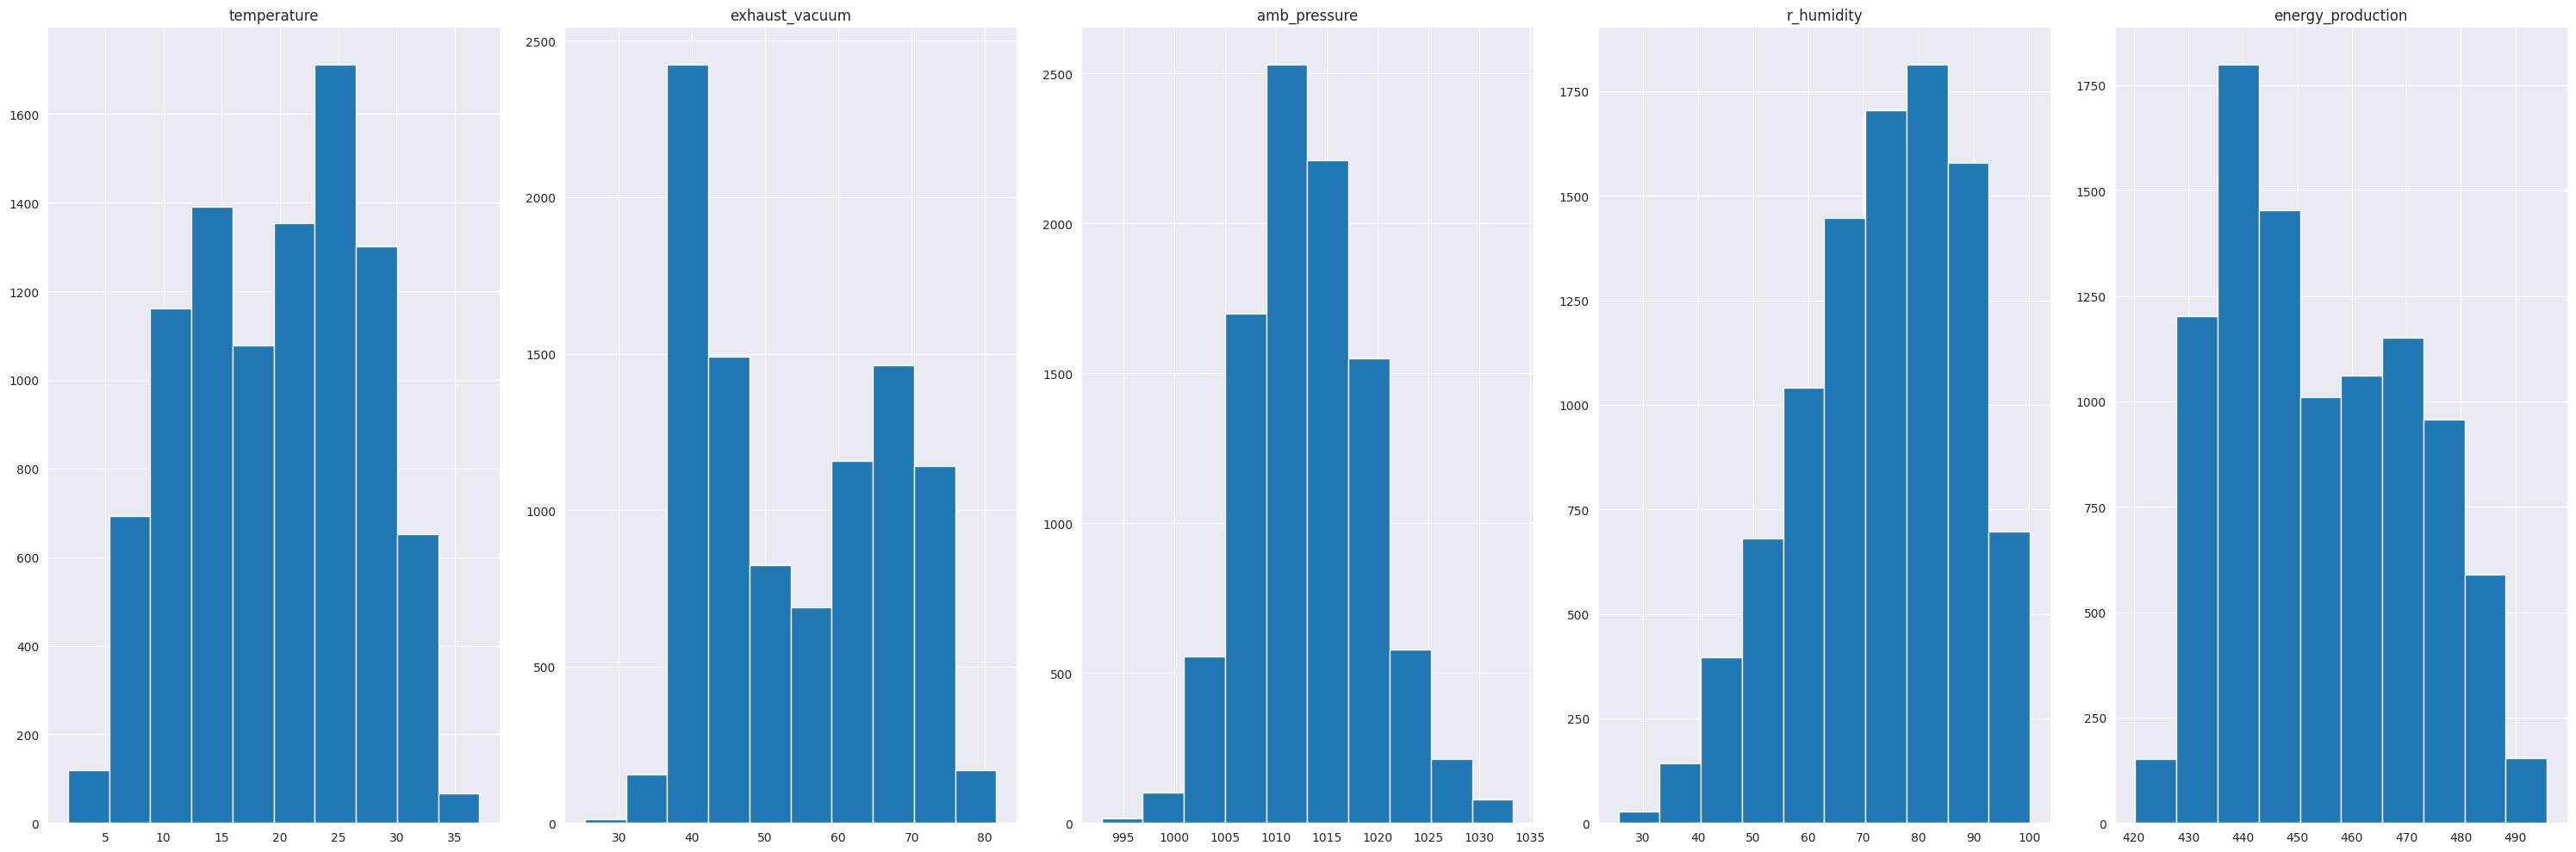

In [26]:
plt.figure(figsize=(30,10))
plt.subplot(1,5,1)
ep_cleaned1['temperature'].hist()
plt.title('temperature')

plt.subplot(1,5,2)
ep_cleaned1['exhaust_vacuum'].hist()
plt.title('exhaust_vacuum')

plt.subplot(1,5,3)
ep_cleaned1['amb_pressure'].hist()
plt.title('amb_pressure')

plt.subplot(1,5,4)
ep_cleaned1['r_humidity'].hist()
plt.title('r_humidity')

plt.subplot(1,5,5)
ep_cleaned1['energy_production'].hist()
plt.title('energy_production')

plt.tight_layout()
plt.show()

#2.Boxplot

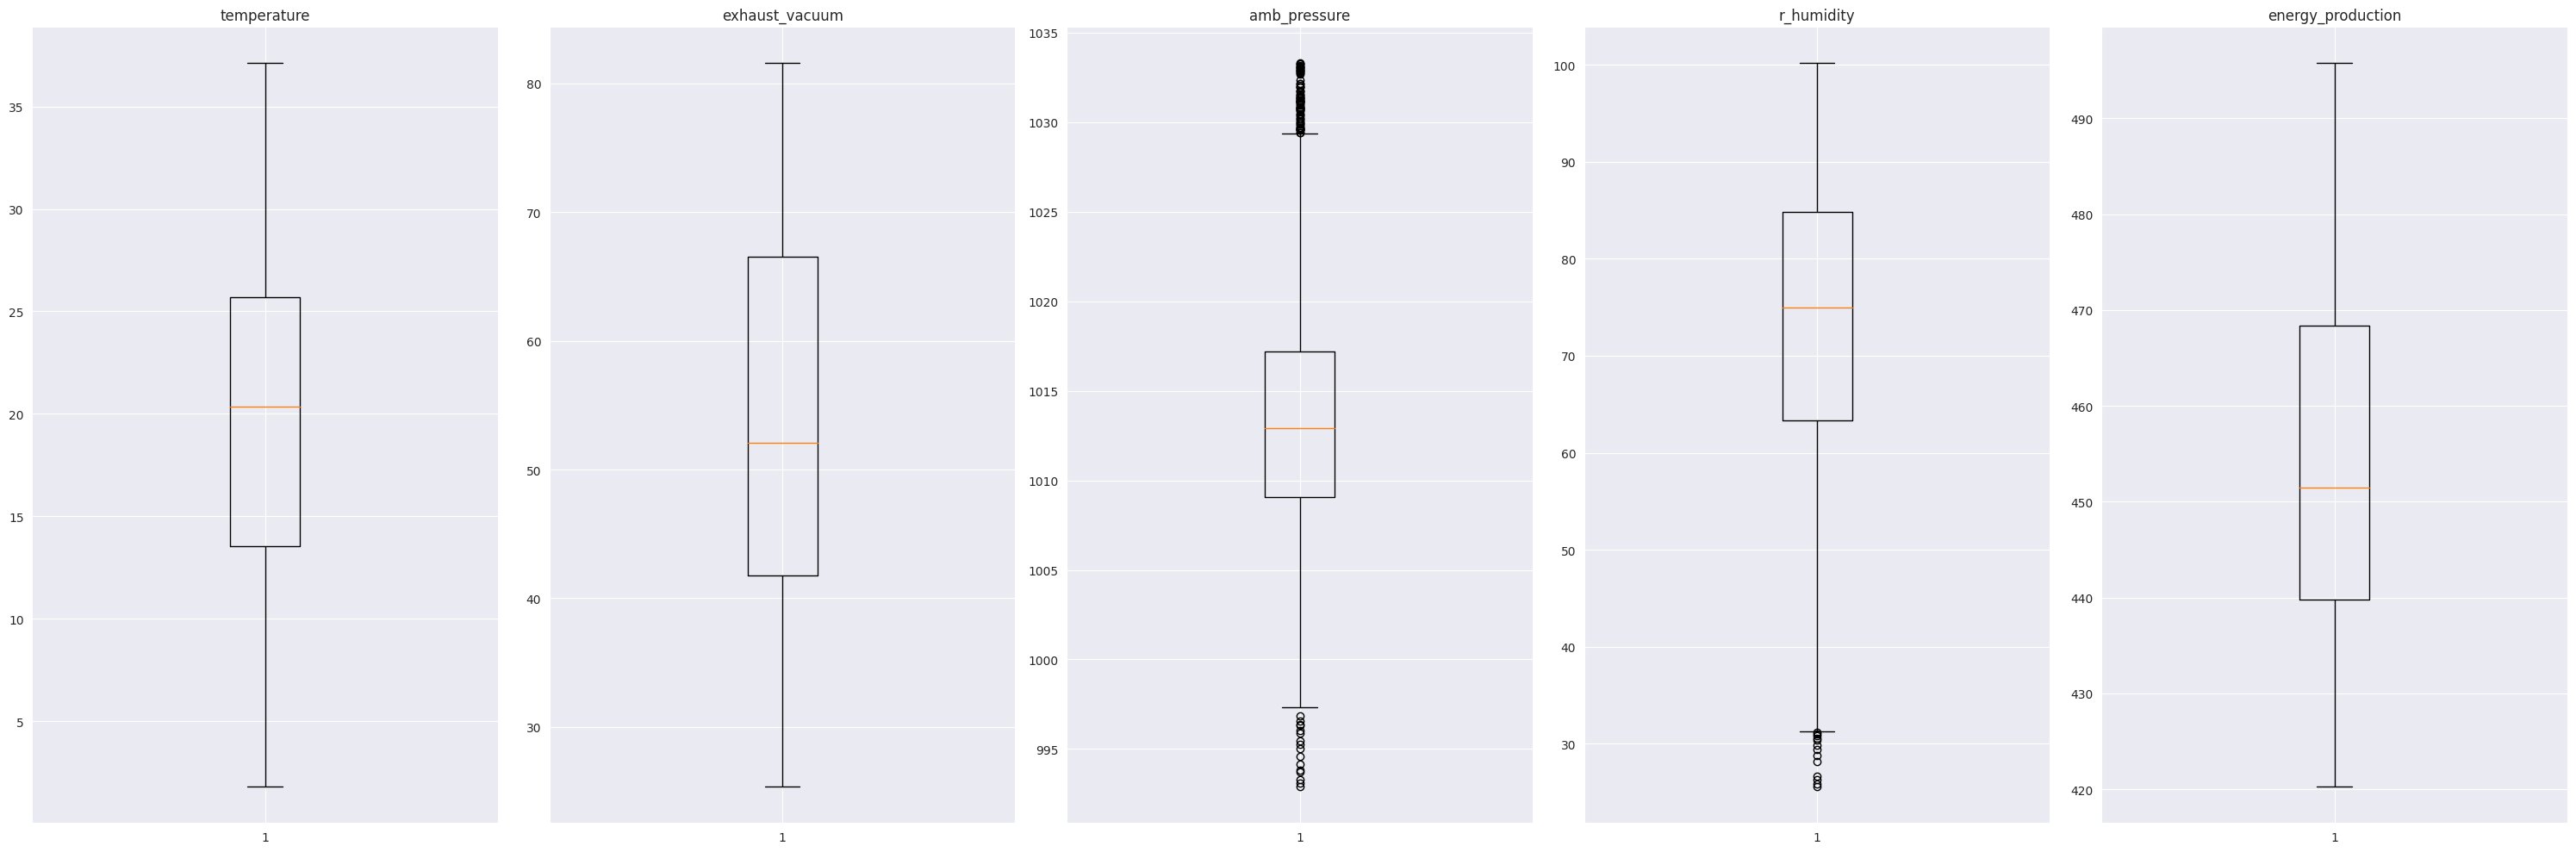

In [27]:
plt.figure(figsize=(30,10))
plt.subplot(1,5,1)
plt.boxplot(ep_cleaned1['temperature'])
plt.title('temperature')

plt.subplot(1,5,2)
plt.boxplot(ep_cleaned1['exhaust_vacuum'])
plt.title('exhaust_vacuum')

plt.subplot(1,5,3)
plt.boxplot(ep_cleaned1['amb_pressure'])
plt.title('amb_pressure')

plt.subplot(1,5,4)
plt.boxplot(ep_cleaned1['r_humidity'])
plt.title('r_humidity')

plt.subplot(1,5,5)
plt.boxplot(ep_cleaned1['energy_production'])
plt.title('energy_production')

plt.tight_layout()
plt.show()

Their are outliers present in the pressure and humidity columns .To treat this we will perform suitable outlier treatment methods.



1.   **Treating amb_pressure outliers**



In [28]:
Q1 = ep_cleaned1.amb_pressure.quantile(0.25)
Q3 = ep_cleaned1.amb_pressure.quantile(0.75)
Q1,Q3

(1009.085, 1017.2)

In [29]:
IQR = Q3-Q1
print(IQR)

8.115000000000009


In [30]:
lower_limit = Q1-1.5*IQR
upper_limit = Q3+1.5*IQR
print('lower limit:',lower_limit ,'\nupper limit' , upper_limit)
ep_cleaned1[(ep_cleaned1.amb_pressure<lower_limit)|(ep_cleaned1.amb_pressure>upper_limit)]

lower limit: 996.9125 
upper limit 1029.3725


temperature  exhaust_vacuum  amb_pressure  r_humidity  energy_production
38           9.95           41.82       1033.09       69.44             477.52
175          9.06           41.92       1029.90       90.88             473.37
315         14.46           42.86       1031.34       69.84             464.44
319         14.58           41.92       1030.42       61.96             462.69
385         14.20           42.86       1031.96       69.59             468.63
...           ...             ...           ...         ...                ...
9093         9.42           41.40       1030.38       87.80             472.99
9125         7.66           41.92       1031.96       82.48             485.11
9331         5.97           36.25       1029.65       86.74             487.03
9368        14.31           42.86       1031.14       69.60             465.36
9501        12.02           41.92       1030.10       84.45             465.82

[91 rows x 5 columns]

In [31]:
#91 outliers are present in amb_pressure

In [32]:
import numpy as np
median= float(ep_cleaned1['amb_pressure'].median())
ep_cleaned1['amb_pressure']=np.where(ep_cleaned1['amb_pressure']>upper_limit,median,ep_cleaned1['amb_pressure'])
ep_cleaned1['amb_pressure']=np.where(ep_cleaned1['amb_pressure']<lower_limit,median,ep_cleaned1['amb_pressure'])

<ipython-input-32-c5a29a0616c3>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-32-c5a29a0616c3>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



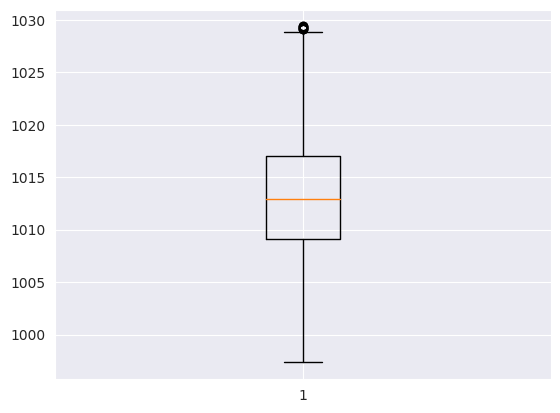

In [33]:
data_box=ep_cleaned1.dropna()
data1_box=data_box.amb_pressure
box2=plt.boxplot(data1_box)
plt.show()

In [34]:
[item.get_ydata() for item in box2['fliers']]

[array([1029.36, 1029.21, 1029.32, 1029.08, 1029.14, 1029.16, 1029.31,
        1029.36])]

In [35]:
ep_cleaned1.drop(ep_cleaned1.index[ep_cleaned1['amb_pressure']>1029], inplace=True)

<ipython-input-35-b40cb34724bb>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



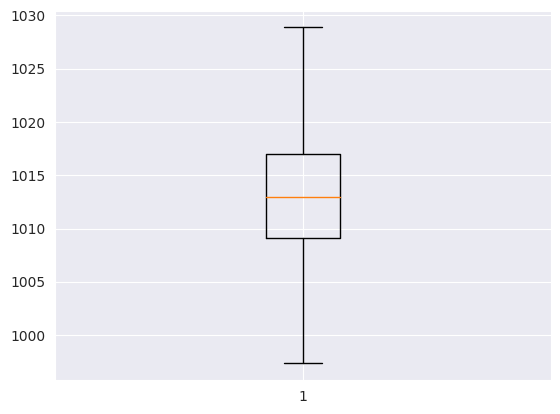

In [36]:
data_box=ep_cleaned1.dropna()
data1_box=data_box.amb_pressure
box2=plt.boxplot(data1_box)
plt.show()

In [37]:
[item.get_ydata() for item in box2['fliers']]

[array([], dtype=float64)]

amp_pressure -data is clean now we have imputed the outliers with median

2.   **Treating r_humidity outliers**

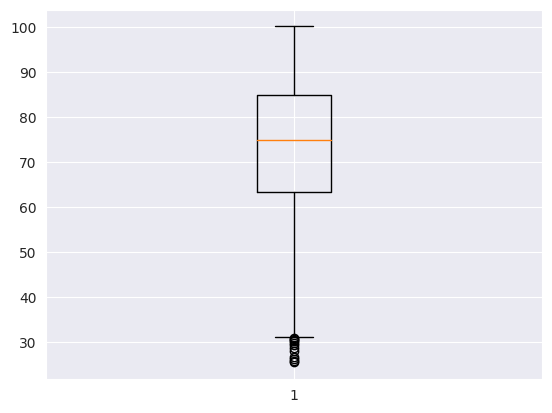

In [38]:
#boxplot
data_box=ep_cleaned1.dropna()
data1_box=data_box.r_humidity
box2=plt.boxplot(data1_box)
plt.show()

In [39]:
[item.get_ydata() for item in box2['fliers']]

[array([28.16, 26.67, 26.3 , 25.89, 29.43, 30.59, 30.99, 29.86, 30.34,
        28.81, 30.83, 25.56])]

In [40]:
#IQR
Q1 = ep_cleaned1.r_humidity.quantile(0.25)
Q3 = ep_cleaned1.r_humidity.quantile(0.75)
print("Q1:",Q1)
print("Q2",Q3)

Q1: 63.36
Q2 84.85


In [41]:
IQR=Q3-Q1
print(IQR)

21.489999999999995


In [42]:
lower_limit = Q1-1.5*IQR
upper_limit = Q3+1.5*IQR
print(lower_limit)
print(upper_limit)

31.125000000000007
117.08499999999998


In [43]:
import numpy as np
median= float(ep_cleaned1['r_humidity'].median())
ep_cleaned1['r_humidity']=np.where(ep_cleaned1['r_humidity']>upper_limit,median,ep_cleaned1['r_humidity'])
ep_cleaned1['r_humidity']=np.where(ep_cleaned1['r_humidity']<lower_limit,median,ep_cleaned1['r_humidity'])

<ipython-input-43-2436a8d422fb>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-43-2436a8d422fb>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



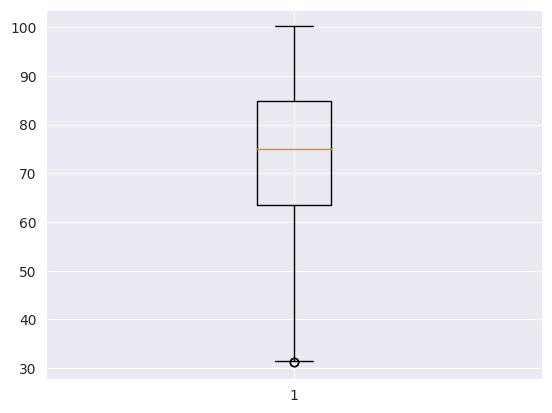

In [44]:
data_box=ep_cleaned1.dropna()# data set is: data_box
data1_box=data_box.r_humidity
box2=plt.boxplot(data1_box)
plt.show()

In [45]:
[item.get_ydata() for item in box2['fliers']]

[array([31.29, 31.15])]

In [46]:
#data_cleaned1.drop(data_cleaned1.index[data_cleaned1['r_humidity']<31], inplace=True)
ep_cleaned1.drop(ep_cleaned1[ep_cleaned1['r_humidity'] == 31.29].index, inplace = True)
ep_cleaned1.drop(ep_cleaned1[ep_cleaned1['r_humidity'] == 31.15].index, inplace = True)

<ipython-input-46-9c79c9df3ce7>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-46-9c79c9df3ce7>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [47]:
data_box=ep_cleaned1.dropna()
data1_box=data_box.r_humidity
box2=plt.boxplot(data1_box)
plt.show()

All the outliers have been treated .

In [48]:
ep_cleaned1

temperature  exhaust_vacuum  amb_pressure  r_humidity  energy_production
0            9.59           38.56       1017.01       60.10             481.30
1           12.04           42.34       1019.72       94.67             465.36
2           13.87           45.08       1024.42       81.69             465.48
3           13.72           54.30       1017.89       79.08             467.05
4           15.14           49.64       1023.78       75.00             463.58
...           ...             ...           ...         ...                ...
9563        17.10           49.69       1005.53       81.82             457.32
9564        24.73           65.34       1015.42       52.80             446.92
9565        30.44           56.24       1005.19       56.24             429.34
9566        23.00           66.05       1020.61       80.29             421.57
9567        17.75           49.25       1020.86       63.67             454.41

[9517 rows x 5 columns]

*   In the original dataset we had **9568 rows**
*   After removing 41 duplicates we were left with **9527 rows**
*   After imputation of outliers with medain and removing some outliers we are left with **9517 rows**

#Correlation analysis

In [49]:
correlation_matrix = ep_cleaned1.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f")
plt.show()

In [50]:
ep_cleaned1.corr()

temperature  exhaust_vacuum  amb_pressure  r_humidity  \
temperature           1.000000        0.843591     -0.503895   -0.541903   
exhaust_vacuum        0.843591        1.000000     -0.414369   -0.311147   
amb_pressure         -0.503895       -0.414369      1.000000    0.106891   
r_humidity           -0.541903       -0.311147      0.106891    1.000000   
energy_production    -0.947896       -0.869786      0.516769    0.389840   

                   energy_production  
temperature                -0.947896  
exhaust_vacuum             -0.869786  
amb_pressure                0.516769  
r_humidity                  0.389840  
energy_production           1.000000

*   From correlation matrix and heatmap we can observe that their is strong negative corelation of temperature and exhaust_vacuum with the energy_production.
*    The amb_pressure and r_humidity have moderate corelation with the energy_production

#Splitting data into X and Y

In [51]:
ep_cleaned1.head()

temperature  exhaust_vacuum  amb_pressure  r_humidity  energy_production
0         9.59           38.56       1017.01       60.10             481.30
1        12.04           42.34       1019.72       94.67             465.36
2        13.87           45.08       1024.42       81.69             465.48
3        13.72           54.30       1017.89       79.08             467.05
4        15.14           49.64       1023.78       75.00             463.58

In [52]:
X=ep_cleaned1.iloc[:,0:4]
Y=ep_cleaned1.iloc[:,4]

In [53]:
X

temperature  exhaust_vacuum  amb_pressure  r_humidity
0            9.59           38.56       1017.01       60.10
1           12.04           42.34       1019.72       94.67
2           13.87           45.08       1024.42       81.69
3           13.72           54.30       1017.89       79.08
4           15.14           49.64       1023.78       75.00
...           ...             ...           ...         ...
9563        17.10           49.69       1005.53       81.82
9564        24.73           65.34       1015.42       52.80
9565        30.44           56.24       1005.19       56.24
9566        23.00           66.05       1020.61       80.29
9567        17.75           49.25       1020.86       63.67

[9517 rows x 4 columns]

In [54]:
Y

0       481.30
1       465.36
2       465.48
3       467.05
4       463.58
         ...  
9563    457.32
9564    446.92
9565    429.34
9566    421.57
9567    454.41
Name: energy_production, Length: 9517, dtype: float64

#Standardization

In [55]:
from sklearn.preprocessing import StandardScaler
X=StandardScaler().fit_transform(X)
X

array([[-1.35377459, -1.24105891,  0.69003638, -0.91627773],
       [-1.02452801, -0.94308195,  1.16947838,  1.46600721],
       [-0.77860098, -0.72708808,  2.00098294,  0.57153054],
       ...,
       [ 1.44818097,  0.1526534 , -1.40110915, -1.18227773],
       [ 0.44834647,  0.92597454,  1.3269335 ,  0.47505386],
       [-0.25718191, -0.39836747,  1.37116246, -0.67026219]])

In [56]:

from sklearn.model_selection import train_test_split,KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
import xgboost as xgb
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import r2_score


#Splitting data into train test part

In [57]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=0)

In [58]:
X_test.shape

(1904, 4)

#Random forest model

In [59]:
model1=RandomForestRegressor(n_estimators=100,random_state=0)
model1.fit(X_train,Y_train)

RandomForestRegressor(random_state=0)

In [60]:
kfold=KFold(n_splits=10)
results=cross_val_score(model1,X,Y,cv=kfold)

In [61]:
results.mean()

0.9625542765969254

In [62]:
#Predicting on test data
preds1=model1.predict(X_test)
preds1

array([478.0303, 429.4054, 450.2847, ..., 439.7227, 454.0995, 460.9812])

In [63]:
#Testing Accuracy
test_data_model_score=model1.score(X_test,Y_test)
print ('Accuracy of test data:',round(test_data_model_score,4))
#Training Accuracy
train_data_model_score=model1.score(X_train,Y_train)
print ('Accuracy of train data:',round(train_data_model_score,4))


Accuracy of test data: 0.9642
Accuracy of train data: 0.9945


In [64]:
# Mean Absolute Error (MAE)
mae = mean_absolute_error(Y_test, preds1)
print(f"Mean Absolute Error (MAE): {mae}")

# Mean Squared Error (MSE)
mse = mean_squared_error(Y_test, preds1)
print(f"Mean Squared Error (MSE): {mse}")

# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse}")

# Root Mean Squared Logarithmic Error (RMSLE)
rmsle = np.sqrt(mean_squared_log_error(1 + Y_test, 1 + preds1))
print(f"Root Mean Squared Logarithmic Error (RMSLE): {rmsle}")

# R-squared (Coefficient of Determination)
r_squared = r2_score(Y_test, preds1)
print(f"R-squared (R^2): {r_squared}")


Mean Absolute Error (MAE): 2.3471513130252033
Mean Squared Error (MSE): 10.448507245467455
Root Mean Squared Error (RMSE): 3.2324150793899373
Root Mean Squared Logarithmic Error (RMSLE): 0.007090234525159465
R-squared (R^2): 0.9642309041820556


In [65]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameters and their possible values
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create the GridSearchCV object
grid_search = GridSearchCV(model1, param_grid, cv=5)

# Fit the GridSearchCV object to the data
grid_search.fit(X_train, Y_train)

# Get the best hyperparameters from the grid search
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Use the best model from the grid search for predictions
best_model = grid_search.best_estimator_
predictions = best_model.predict(X_test)

# Evaluate the best model
mse_best_model = mean_squared_error(Y_test, predictions)
print("Mean Squared Error (Best Model):", mse_best_model)


Best Hyperparameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 150}
Mean Squared Error (Best Model): 10.399653781565531


## Linear Regression Model

In [70]:
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, Y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(Y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Mean Absolute Error (MAE)
mae = mean_absolute_error(Y_test, preds1)
print(f"Mean Absolute Error (MAE): {mae}")


# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse}")

# Root Mean Squared Logarithmic Error (RMSLE)
rmsle = np.sqrt(mean_squared_log_error(1 + Y_test, 1 + preds1))
print(f"Root Mean Squared Logarithmic Error (RMSLE): {rmsle}")

# R-squared (Coefficient of Determination)
r_squared = r2_score(Y_test, preds1)
print(f"R-squared (R^2): {r_squared}")


Mean Squared Error: 20.655250174669366
Mean Absolute Error (MAE): 2.3471513130252033
Root Mean Squared Error (RMSE): 4.544804745494504
Root Mean Squared Logarithmic Error (RMSLE): 0.007090234525159465
R-squared (R^2): 0.9642309041820556


## SVR MODEL

In [73]:
svr_model = SVR(kernel='linear', C=1.0)  # You can choose different kernels (linear, rbf, poly, etc.) and adjust hyperparameters

# Fit the model to the training data
svr_model.fit(X_train, Y_train.ravel())

# Make predictions on the test set
y_pred = svr_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(Y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# For linear kernel, you can print the coefficients (weights)
if svr_model.kernel == 'linear':
    print("Coefficients (weights):", svr_model.coef_)
    print("Intercept:", svr_model.intercept_)

Mean Squared Error: 21.012711656593336
Coefficients (weights): [[-15.0101775   -3.03959632   0.39039821  -2.22373814]]
Intercept: [454.17353473]


In [ ]:
Decision Tree Model

# Decision Tree Model

In [89]:
from sklearn.tree import DecisionTreeRegressor

In [90]:
tree_model = DecisionTreeRegressor(random_state=42)


tree_model.fit(X_train, Y_train)


y_pred = tree_model.predict(X_test)


mse = mean_squared_error(Y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 21.626646481092447


## KNN Model

In [91]:
from sklearn.neighbors import KNeighborsRegressor

In [85]:
knn_model = KNeighborsRegressor(n_neighbors=3)


knn_model.fit(X_train, Y_train)


y_pred = knn_model.predict(X_test)


mse = mean_squared_error(Y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 14.23071520774976
